In [1]:
! which python

/Users/guozhiqi/anaconda3/envs/ml/bin/python


In [2]:
! conda info --envs

# conda environments:
#
base                     /Users/guozhiqi/Downloads/enter
                      *  /Users/guozhiqi/anaconda3/envs/ml



In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [32]:

df = pd.read_csv("../input/cat_train.csv")

In [5]:
df

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,0.0,1.0,0.0,T,N,Red,Polygon,Axolotl,India,...,015c63324,3.0,Novice,Freezing,a,R,GZ,5.0,NaN,0
599996,599996,1.0,0.0,0.0,T,Y,Blue,Polygon,Dog,Costa Rica,...,a02ae6a63,2.0,Novice,Boiling Hot,n,N,sf,NaN,3.0,0
599997,599997,0.0,0.0,0.0,F,Y,Red,Circle,Axolotl,Russia,...,40f9610c1,2.0,Contributor,Freezing,n,H,MV,7.0,5.0,0
599998,599998,1.0,1.0,0.0,F,Y,NaN,Polygon,Axolotl,NaN,...,c1a8374a0,1.0,Master,Warm,m,X,Ey,1.0,5.0,0


In [9]:
df.dtypes

id          int64
bin_0     float64
bin_1     float64
bin_2     float64
bin_3      object
bin_4      object
nom_0      object
nom_1      object
nom_2      object
nom_3      object
nom_4      object
nom_5      object
nom_6      object
nom_7      object
nom_8      object
nom_9      object
ord_0     float64
ord_1      object
ord_2      object
ord_3      object
ord_4      object
ord_5      object
day       float64
month     float64
target      int64
dtype: object

In [10]:
df.target.unique()

array([0, 1])

In [20]:
label_distribution

0    487677
1    112323
Name: target, dtype: int64

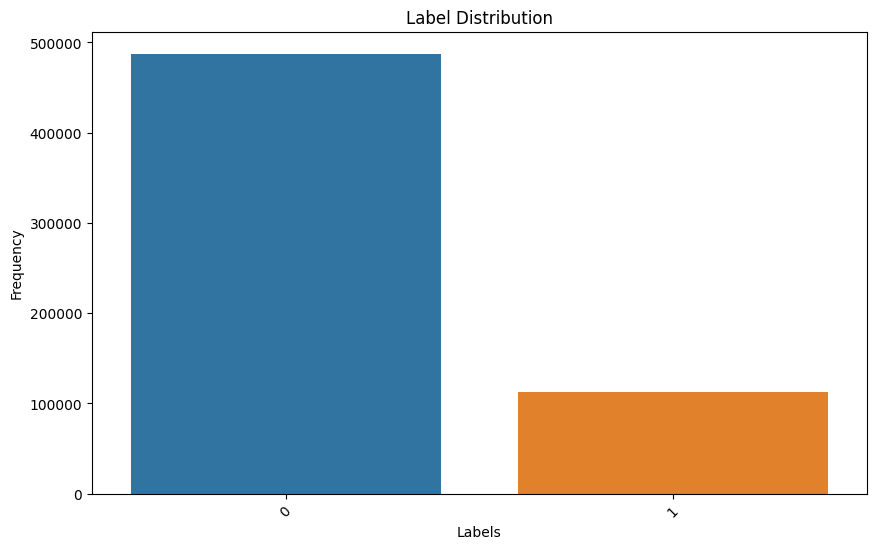

In [19]:
# 假设你的数据集文件名为 dataset.csv，并且它位于当前工作目录中
# 你可以根据实际情况调整文件名和路径
file_path = 'dataset.csv'


# 计算标签的分布
label_distribution = df['target'].value_counts()


# 如果你想使用seaborn
# 你可以通过取消注释以下代码来创建一个更美观的图表
plt.figure(figsize=(10, 6))
sns.barplot(x=label_distribution.index, y=label_distribution.values)
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [12]:
df['ord_2'].unique()

array(['Hot', 'Warm', 'Freezing', 'Lava Hot', 'Cold', 'Boiling Hot', nan],
      dtype=object)

In [21]:
mapping = {
"Freezing": 0, "Warm": 1, "Cold": 2, "Boiling Hot": 3, "Hot": 4,
    "Lava Hot": 5
}

In [23]:
df.loc[:, "ord_2"] = df.ord_2.map(mapping)

In [25]:
df.ord_2.value_counts()

0.0    142726
1.0    124239
2.0     97822
3.0     84790
4.0     67508
5.0     64840
Name: ord_2, dtype: int64

In [27]:
# fill NaN values in ord_2 column
df.loc[:, "ord_2"] = df.ord_2.fillna("NONE")

In [29]:
sparse_example

<3x3 sparse matrix of type '<class 'numpy.longlong'>'
	with 4 stored elements in Compressed Sparse Row format>

In [28]:
import numpy as np
from scipy import sparse
# create our example feature matrix
example = np.array( [
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 1]
] )
# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)
# print size of this sparse matrix
print(sparse_example.data.nbytes)

32


In [30]:
print(
sparse_example.data.nbytes + sparse_example.indptr.nbytes + sparse_example.indices.nbytes
)

64


In [33]:
df.groupby(["ord_2"])["id"].count()

ord_2
Boiling Hot     84790
Cold            97822
Freezing       142726
Hot             67508
Lava Hot        64840
Warm           124239
Name: id, dtype: int64

In [34]:
df.groupby(["ord_2"])["id"].count().sum()

581925

In [35]:
df.groupby(["ord_2"])["id"].transform("count")

0          67508.0
1         124239.0
2         142726.0
3          64840.0
4          97822.0
            ...   
599995    142726.0
599996     84790.0
599997    142726.0
599998    124239.0
599999     84790.0
Name: id, Length: 600000, dtype: float64

In [36]:
df['ord_2']

0                 Hot
1                Warm
2            Freezing
3            Lava Hot
4                Cold
             ...     
599995       Freezing
599996    Boiling Hot
599997       Freezing
599998           Warm
599999    Boiling Hot
Name: ord_2, Length: 600000, dtype: object

In [37]:
# read fold validation dataset
df = pd.read_csv("../input/cat_train_folds.csv")

In [38]:
df

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,kfold
0,509677,0.0,0.0,0.0,T,N,Green,Circle,Dog,India,...,3.0,Grandmaster,Lava Hot,k,F,YJ,5.0,2.0,0,0
1,121685,0.0,0.0,1.0,F,Y,Blue,Trapezoid,Axolotl,Russia,...,3.0,Grandmaster,Cold,l,N,AW,3.0,6.0,0,0
2,362744,0.0,0.0,1.0,T,Y,Blue,Polygon,Hamster,Costa Rica,...,2.0,Contributor,Freezing,b,F,sf,5.0,8.0,1,0
3,366724,0.0,0.0,0.0,T,N,Red,Triangle,Hamster,Finland,...,1.0,Novice,Warm,c,A,th,2.0,11.0,0,0
4,491367,0.0,0.0,0.0,F,N,Green,Polygon,Hamster,Russia,...,3.0,Contributor,Boiling Hot,n,Y,DR,1.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,2193,0.0,0.0,0.0,T,Y,Red,NaN,Hamster,Canada,...,3.0,Grandmaster,Hot,m,U,gc,6.0,8.0,1,4
599996,61093,0.0,0.0,1.0,T,N,Blue,NaN,Lion,Russia,...,1.0,Novice,Freezing,g,D,NaN,3.0,8.0,0,4
599997,70787,0.0,0.0,1.0,F,N,Red,Trapezoid,Hamster,Russia,...,2.0,Expert,Warm,a,Y,XM,2.0,3.0,1,4
599998,102723,0.0,0.0,0.0,F,Y,Red,Polygon,Dog,Canada,...,2.0,Contributor,Freezing,k,R,gj,6.0,11.0,0,4


In [39]:
df.kfold.value_counts()

4    120000
3    120000
2    120000
1    120000
0    120000
Name: kfold, dtype: int64

In [40]:
df[df.kfold==0].target.value_counts()

0    97536
1    22464
Name: target, dtype: int64

In [41]:
df[df.kfold==1].target.value_counts()

0    97536
1    22464
Name: target, dtype: int64

In [42]:
df[df.kfold==2].target.value_counts()

0    97535
1    22465
Name: target, dtype: int64

In [43]:
df[df.kfold==3].target.value_counts()

0    97535
1    22465
Name: target, dtype: int64

In [44]:
df[df.kfold==4].target.value_counts()

0    97535
1    22465
Name: target, dtype: int64